## Probelm Statement 

### Description
Context
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

Content
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


## 1. Dataset Preparation

### 1.1 Import

In [2]:
# Importing libraries necessary for the study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Reading Data file

In [3]:
# reading the dataset
hotel_df = pd.DataFrame(pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv'))
hotel_df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### 1.3 Data Inspection

In [4]:
hotel_df.shape

(119390, 32)

In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [6]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 2. Data Cleaning

#### Data Cleaning - Missing Value, Duplicates, Imputing, Dropping, Deleting, Exploration

In [7]:
round(100*(hotel_df.isnull().sum()/len(hotel_df.index)), 2).sort_values(ascending = False) 

company                           94.31
agent                             13.69
country                            0.41
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
is_canceled                        0.00
market_segment                     0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
reservation_status_date            0.00
distribution_channel               0.00
reservation_status                 0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00


In [8]:
#Removing columns having missing value % is >=50
hotel_df.drop('company',axis=1,inplace=True)

In [9]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
#Remove null values 
hotel_df.dropna(inplace=True)

In [11]:
round(100*(hotel_df.isnull().sum()/len(hotel_df.index)), 2).sort_values(ascending = False) 

reservation_status_date           0.0
market_segment                    0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
distribution_channel              0.0
reservation_status                0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_typ

In [12]:
#unique value in dataframe
cols = hotel_df.columns
for i in cols:
    print(i,hotel_df[i].unique(),'\n','*********************************************')

hotel ['Resort Hotel' 'City Hotel'] 
 *********************************************
is_canceled [0 1] 
 *********************************************
lead_time [ 13  14   9  85  75  23  35  68  18  37  12   7  72 127  78  48  60  77
  99  95  69  45  40  15  36  43  70 107  47  96 113  90  50  93  76   3
   1   0  10   5  17  51  71  63  62 101   2  81 368 364 324  79  21 109
 102   4  98  92  26  73 115  86  52  29  30  33   8 100  44  80  97  64
  39  34  27  82 110 111  94  84  66 104  28 258 112  65  67  55  88  54
 292  83 105 280 394  24 103  16 366 249  22  91  11 108 106  31  87  41
  32 304 117  59  53  58 116  42 321 118  56  49 317   6  38  57  19 315
  25 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124 327 131
 460 140 114 139 122 137 126 120 128 135 150 143 151 132 157 147 138 156
 164 346 159 160 161 333 381 149 297 163 314 155 323 340 356 328 144 248
 302 175 344 382 146 170 166 338 167 310 148 165 172 171 145 121 178 305
 173 152 354 347 158 125 185 177 142 

In [13]:
#total number of guests
hotel_df['guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies'] 

In [14]:
hotel_df['rate_per_person'] = hotel_df['adr'] / (hotel_df['adults'] + hotel_df['children']  )
hotel_df.rate_per_person.round(2)

3         75.00
4         49.00
5         49.00
7         51.50
8         41.00
          ...  
119385    48.07
119386    75.14
119387    78.86
119388    52.20
119389    75.60
Name: rate_per_person, Length: 102894, dtype: float64

In [15]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## 3. Data Visualization

#### hotel

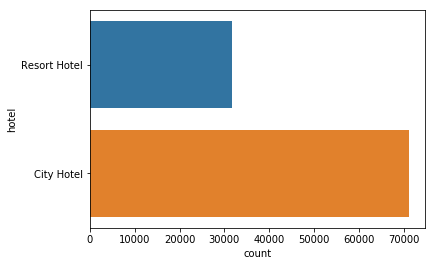

In [16]:
sns.countplot(y=hotel_df['hotel'])

#### customer_type

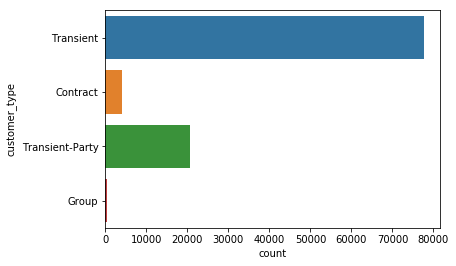

In [17]:
sns.countplot(y=hotel_df['customer_type'])

#### meal

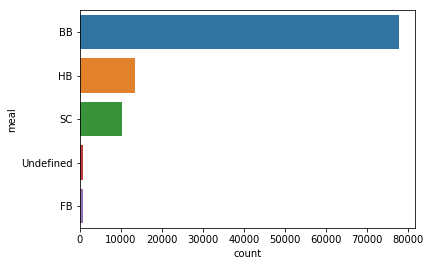

In [18]:
sns.countplot(y=hotel_df['meal'],order=hotel_df['meal'].value_counts().index)

#### market_segment

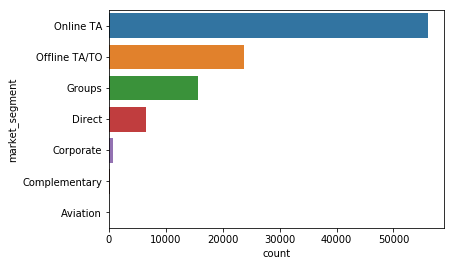

In [19]:
sns.countplot(y=hotel_df['market_segment'],order = hotel_df['market_segment'].value_counts().index)

#### arrival_date_month

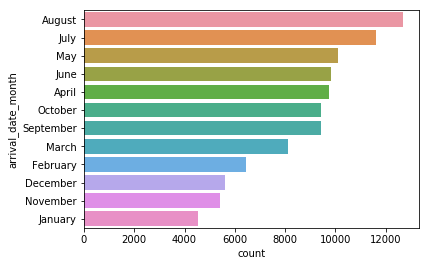

In [20]:
sns.countplot(y=hotel_df['arrival_date_month'],order = hotel_df['arrival_date_month'].value_counts().index)

#### distribution_channel

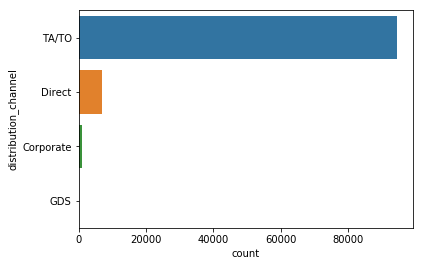

In [21]:
sns.countplot(y=hotel_df['distribution_channel'],order = hotel_df['distribution_channel'].value_counts().index)

#### deposit_type

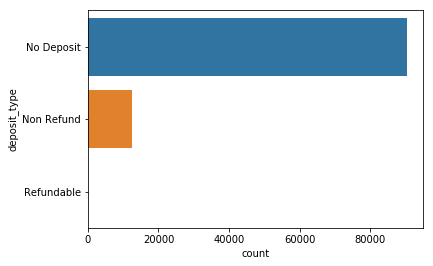

In [22]:
sns.countplot(y=hotel_df['deposit_type'],order = hotel_df['deposit_type'].value_counts().index)

#### reservation_status

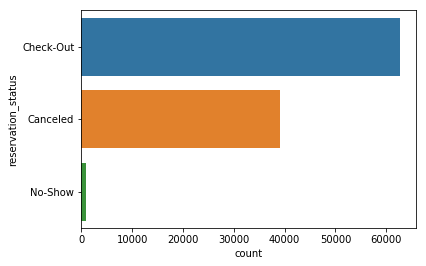

In [23]:
sns.countplot(y=hotel_df['reservation_status'],order = hotel_df['reservation_status'].value_counts().index)

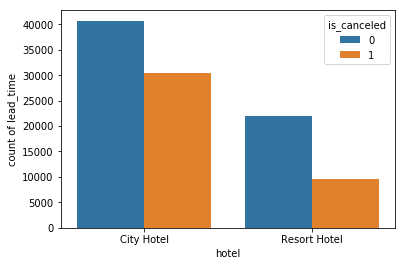

In [24]:
sns.barplot(x="hotel", y="lead_time", hue="is_canceled", data=hotel_df.groupby(["hotel","is_canceled"]).lead_time.count().reset_index())
plt.ylabel('count of lead_time')
plt.show()

#### distribution_channel wise Number of cancellation

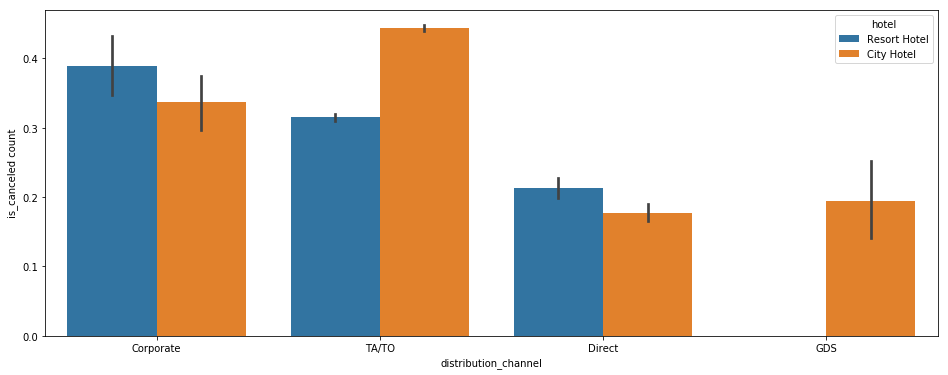

In [25]:
plt.figure(figsize=(16, 6))
sns.barplot(x="distribution_channel", y="is_canceled", hue="hotel", data=hotel_df)
plt.ylabel('is_canceled count')
plt.show()

#### market_segment wise Number of cancellation

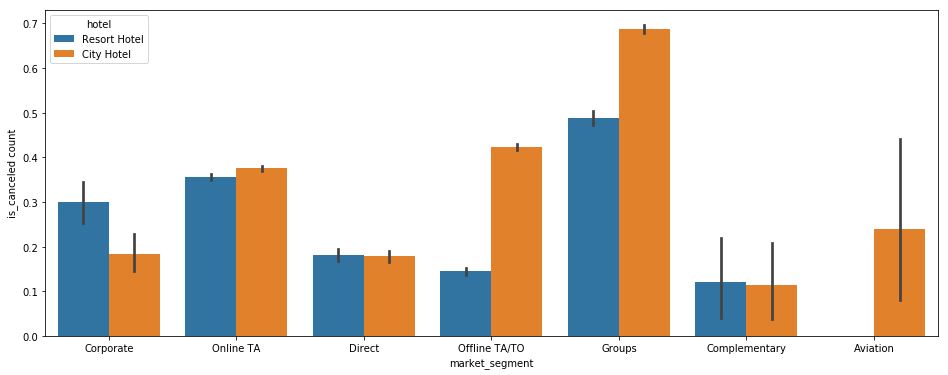

In [26]:
plt.figure(figsize=(16, 6))
sns.barplot(x="market_segment", y="is_canceled", hue="hotel", data=hotel_df)
plt.ylabel('is_canceled count')
plt.show()

#### distribution of reserved_room_type and total_of_special_requests

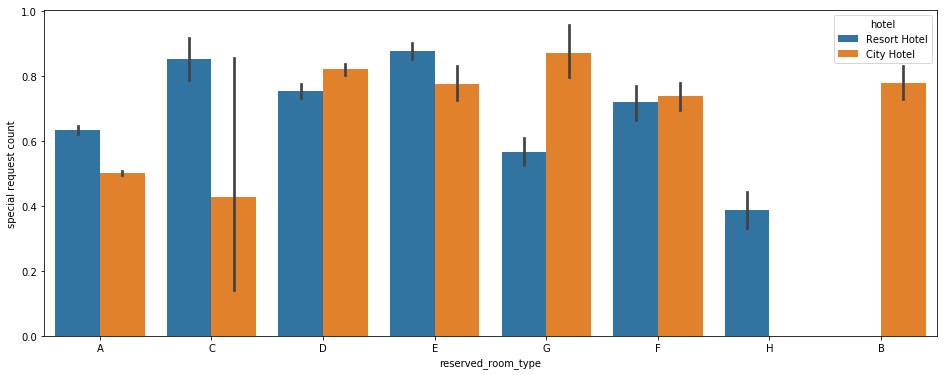

In [27]:
plt.figure(figsize=(16, 6))
sns.barplot(y="total_of_special_requests", x="reserved_room_type", hue="hotel", data=hotel_df)
plt.ylabel('special request count')
plt.show()

#### Reservation status per month

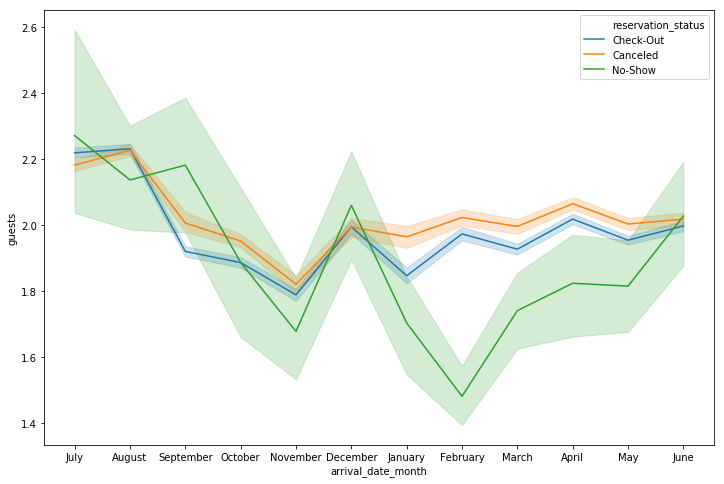

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="guests", hue="reservation_status", data=hotel_df,  sizes=(2.5, 2.5),sort=False)

#### Number of guests per month

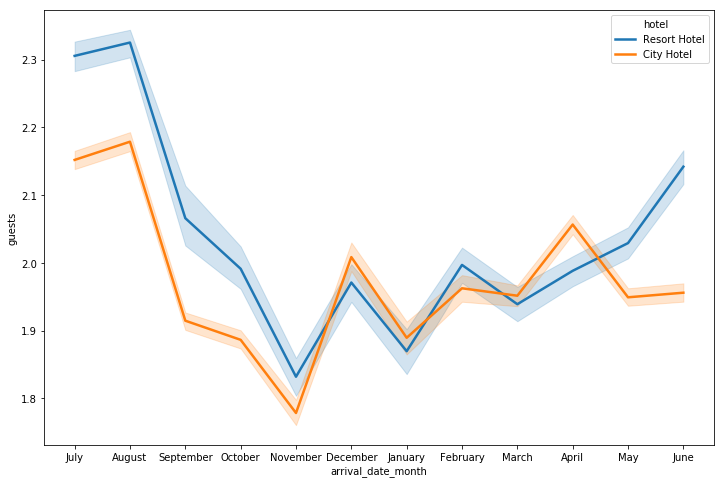

In [29]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="guests", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

#### total_of_special_requests per month

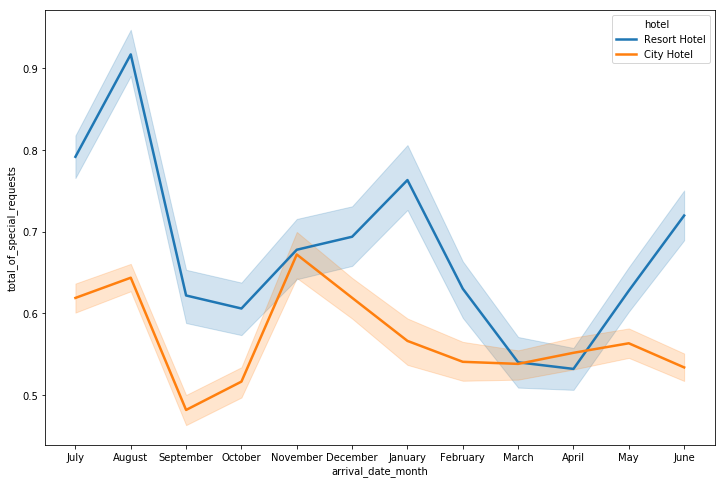

In [30]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="total_of_special_requests", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

#### Booking changes per month

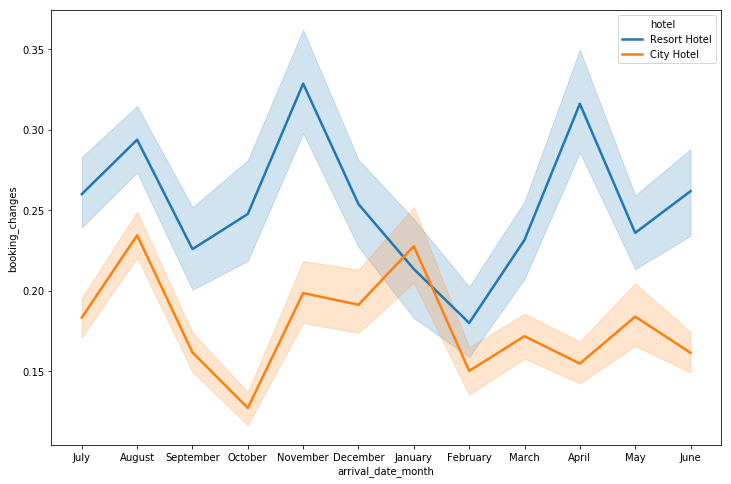

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="booking_changes", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

#### Number of repeated guests per month

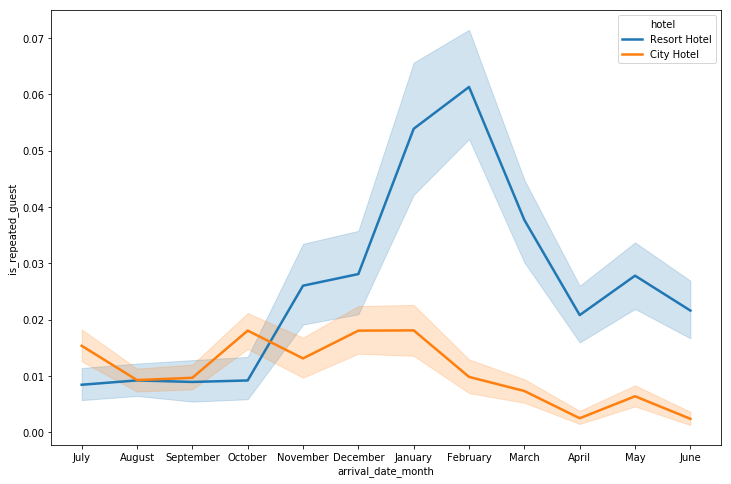

In [32]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="is_repeated_guest", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

#### previous cancellation per month

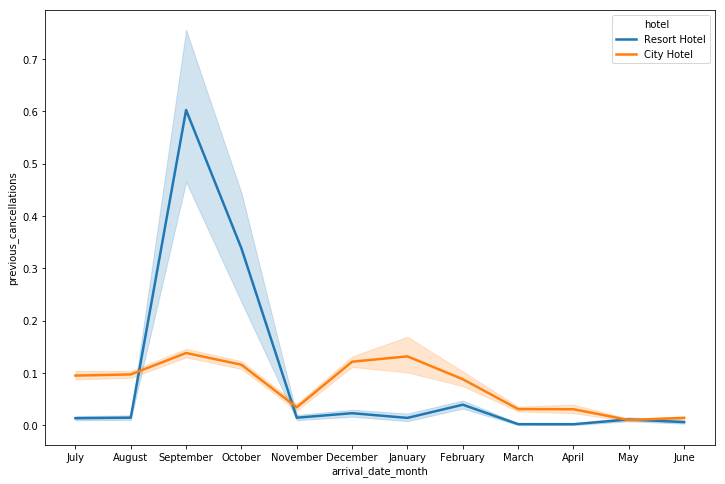

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="previous_cancellations", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

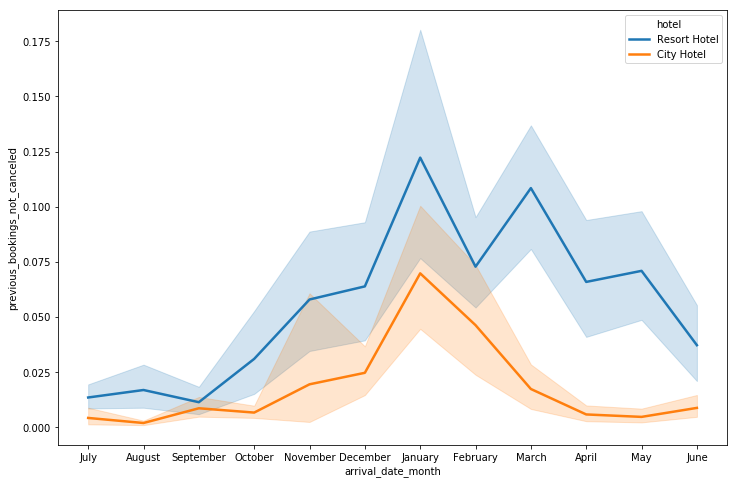

In [34]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="previous_bookings_not_canceled", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

#### Distribution of stays_in_weekend_nights per month

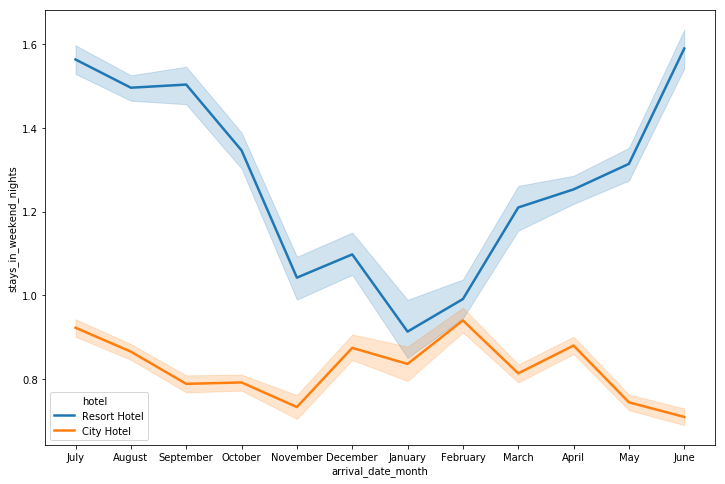

In [35]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="stays_in_weekend_nights", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

#### Distribution of stays_in_week_nights per month

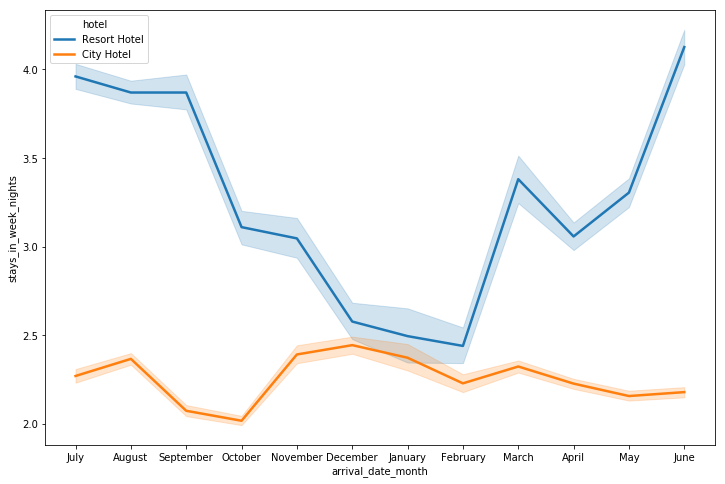

In [36]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="stays_in_week_nights", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

#### Room wise deposit rate per person

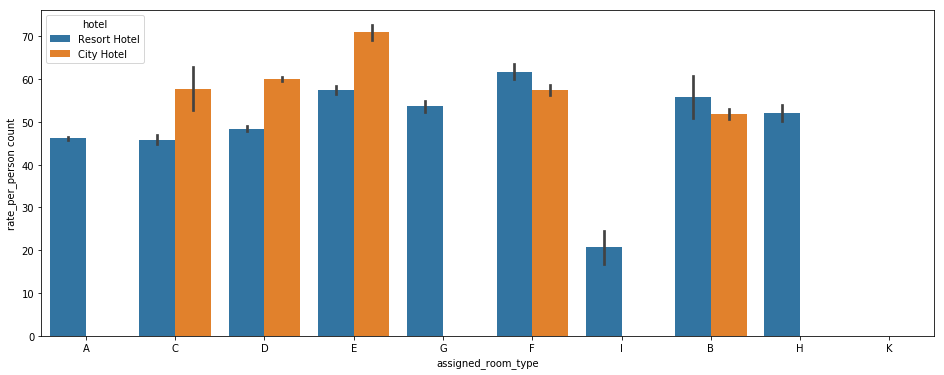

In [37]:
plt.figure(figsize=(16, 6))
sns.barplot(x="assigned_room_type", y="rate_per_person", hue="hotel", data=hotel_df)
plt.ylabel('rate_per_person count')
plt.show()

#### Booking changes per month

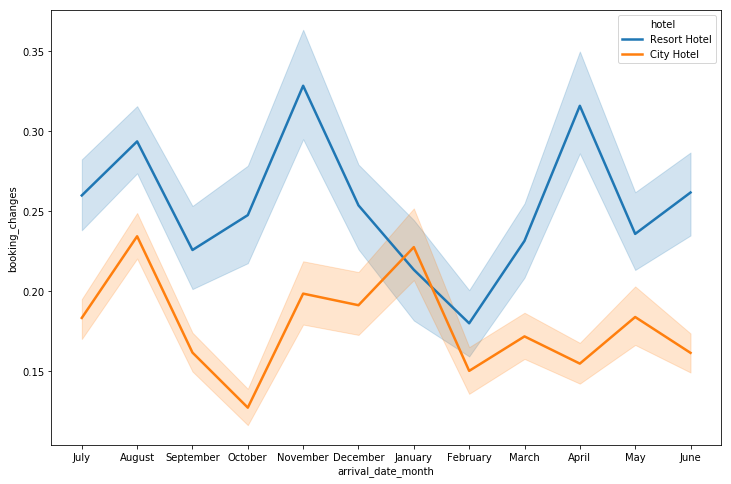

In [38]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="booking_changes", hue="hotel", data=hotel_df, size="hotel", sizes=(2.5, 2.5),sort=False)

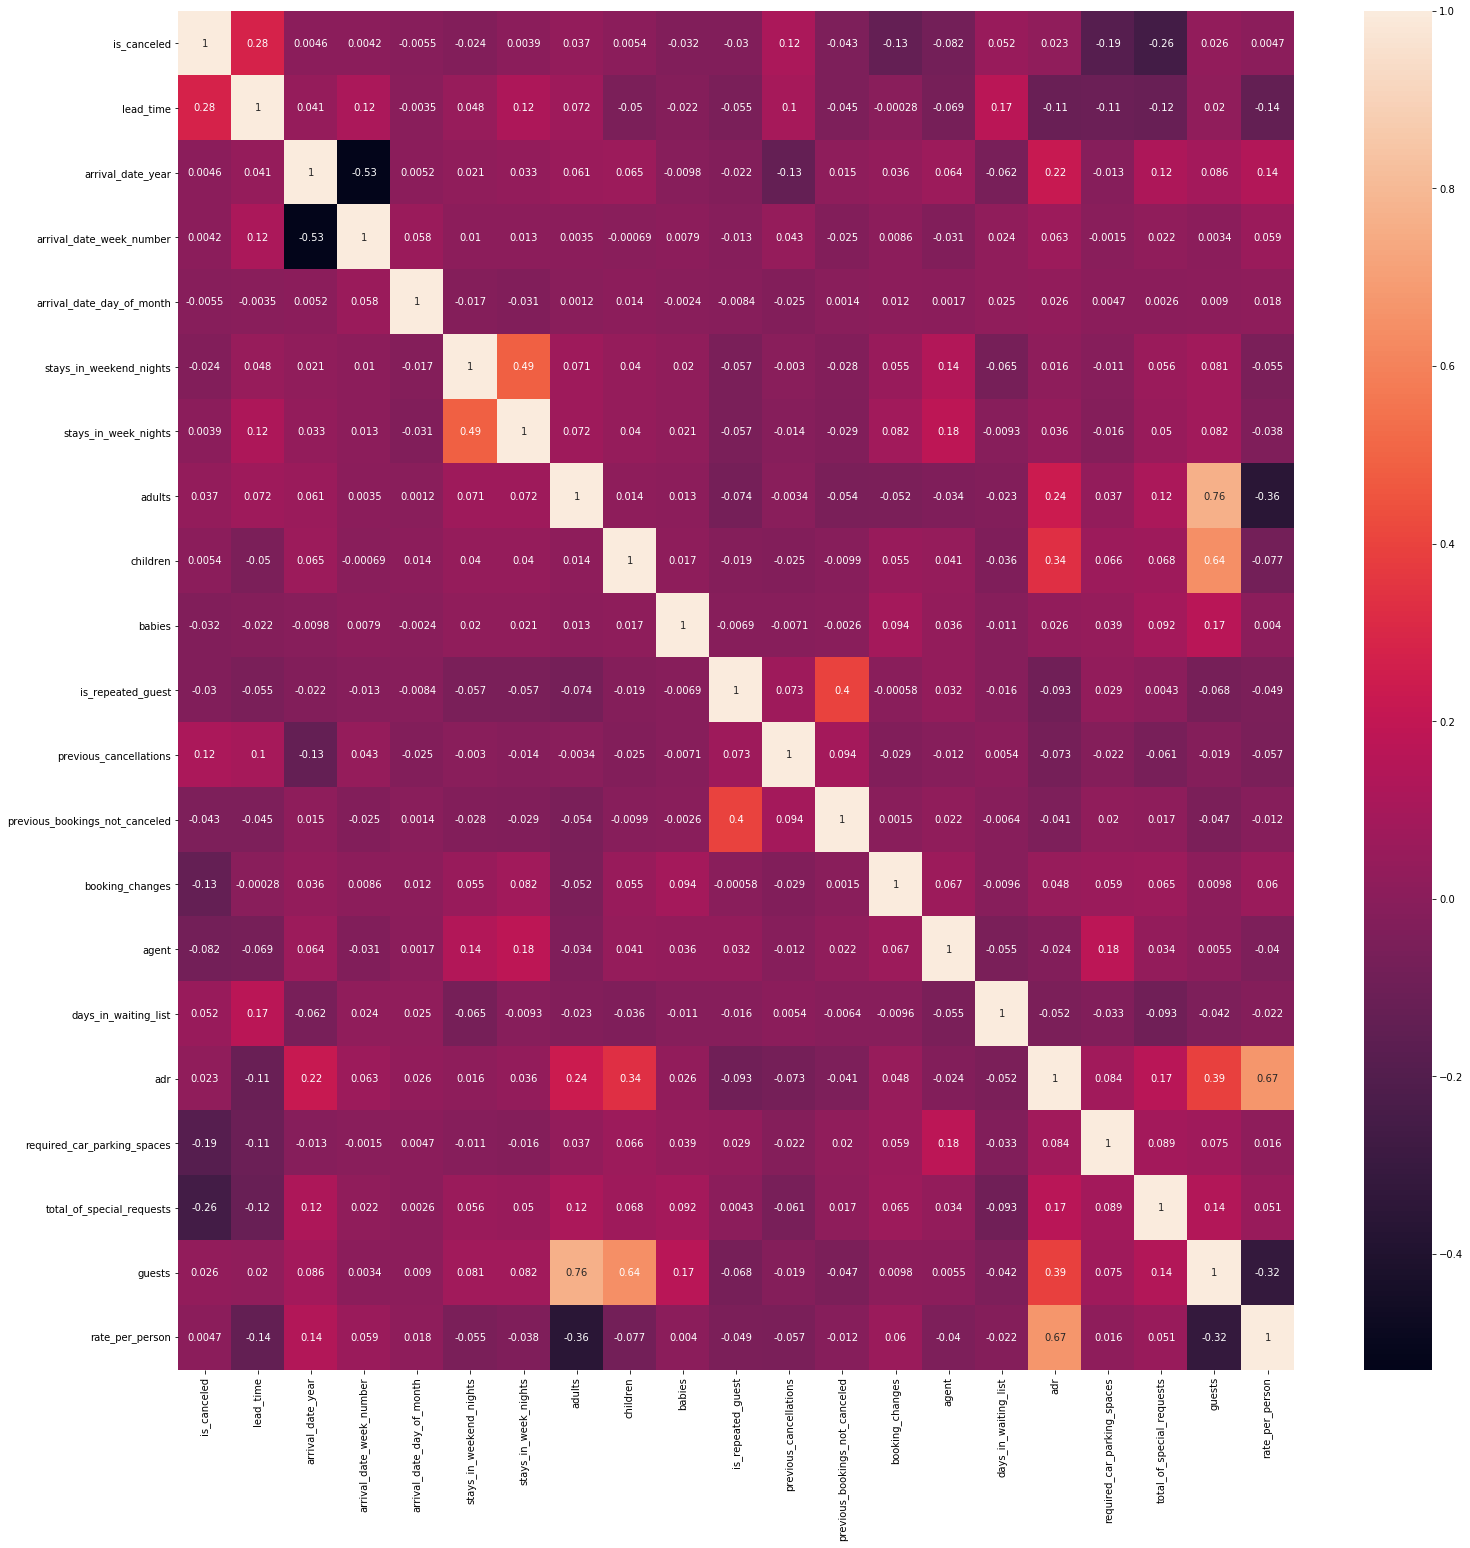

In [39]:
#heatmap
plt.figure(figsize=(25,25))
sns.heatmap(hotel_df.corr(), annot= True)